##### Importing Important Libraries

In [875]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")

In [977]:
# !pip install (unavailable libraries)

##### 

##### Reading the data in json format and converting it to a Dataframe

In [876]:
import json
l=[]
with open('transactions.txt', 'r') as fobj:
    for j in fobj:
        #print(j)
        json_object = json.loads(j)
        l.append(json_object)
data = pd.json_normalize(l)

In [877]:
(data).shape

(786363, 29)

##### summarizing the data

In [878]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [879]:
data.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [880]:
data.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

##### 

##### Null Values check and handling

In [881]:
print(data.isnull().sum().sum())

# No null values in the data but there are empty strings which I am assuming null values

# empty string columns values ''

for i in data:
    if (data[i]=='').sum()>1:
        print(i,(data[i]=='').sum())

data=data.replace(r'^\s*$', np.nan, regex=True)
data.isnull().sum()

0
acqCountry 4562
merchantCountryCode 724
posEntryMode 4054
posConditionCode 409
transactionType 698
echoBuffer 786363
merchantCity 786363
merchantState 786363
merchantZip 786363
posOnPremises 786363
recurringAuthInd 786363


accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

##### 

##### Dropping constant variables which means the variance within that column is 0 and hence it adds no value to the model

In [882]:
l=[]
for col in data.columns:
    print(col,':',len(data[col].unique()))
    if len(data[col].unique())==1:
        l.append(col)
print("dropping constant variables",l)
data.drop(l,1,inplace=True)  # dropping constant variable as they add no value
#data.dropna(inplace=True)

accountNumber : 5000
customerId : 5000
creditLimit : 10
availableMoney : 521916
transactionDateTime : 776637
transactionAmount : 66038
merchantName : 2490
acqCountry : 5
merchantCountryCode : 5
posEntryMode : 6
posConditionCode : 4
merchantCategoryCode : 19
currentExpDate : 165
accountOpenDate : 1820
dateOfLastAddressChange : 2184
cardCVV : 899
enteredCVV : 976
cardLast4Digits : 5246
transactionType : 4
echoBuffer : 1
currentBalance : 487318
merchantCity : 1
merchantState : 1
merchantZip : 1
cardPresent : 2
posOnPremises : 1
recurringAuthInd : 1
expirationDateKeyInMatch : 2
isFraud : 2
dropping constant variables ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']


In [883]:
data.fillna(data.mode().iloc[0],inplace=True)
data.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

Since all null values were in categorical data columns, I have used mode of that column to fill Nan values. These values could be dropped as well which would would result in data loss.

##### 

<AxesSubplot:>

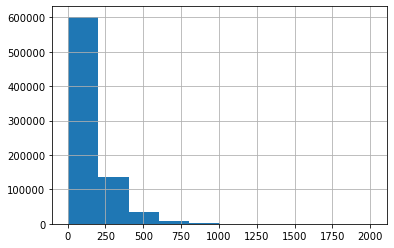

In [884]:
data.transactionAmount.hist()

Histogram of transaction amount is a highly right skewed distribution

In [885]:
(data.transactionAmount).value_counts()

0.00      22225
8.21        132
49.30       125
8.81        124
4.39        120
          ...  
534.26        1
475.93        1
732.02        1
518.19        1
624.07        1
Name: transactionAmount, Length: 66038, dtype: int64

In [886]:
data[data.transactionAmount==0.0].isFraud.value_counts()

False    22103
True       122
Name: isFraud, dtype: int64

I see that there are 22225 0$ transactions of which, most are not fraud (only 122 row items are classified as Fraud)

##### 

##### 

In [887]:
data[data.transactionAmount==0.0].transactionType.value_counts()

ADDRESS_VERIFICATION    20169
PURCHASE                 1484
REVERSAL                  572
Name: transactionType, dtype: int64

In [888]:
data.transactionType.value_counts()

PURCHASE                745891
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

All transaction type of address_verification has a transaction amount of 0.0

##### 

###### Checking for patterns in different features

<AxesSubplot:xlabel='creditLimit'>

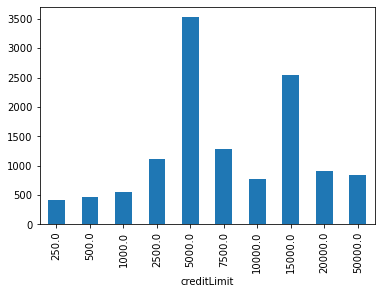

In [889]:
(data[data.isFraud==True].groupby('creditLimit').count()['isFraud']).plot(kind='bar')

Most of the Fraudulent transactions are for those accounts having credit limit as 5000\\$ and 15000\\$

##### 

<AxesSubplot:xlabel='merchantCategoryCode'>

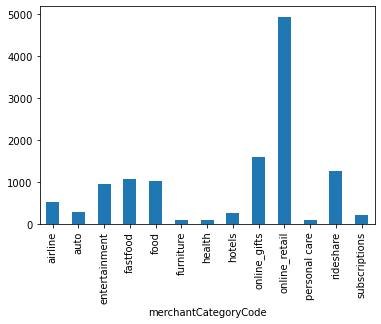

In [890]:
(data[data.isFraud==True].groupby('merchantCategoryCode').count()['isFraud']).plot(kind='bar')
# online retail has maximum number of frauds

For all merchant categories, most of the Fraudulent transactions are within the Online Retail category. So I will be focussing on this while feature engineering as this a trend/pattern in the data!

##### 

True     779348
False      7015
dtype: int64


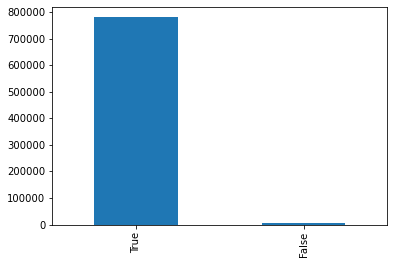

In [891]:
#assumption: if cvv not correctly entered, it might be a fraud transaction

#checking the number of correct cvv entered
(data.cardCVV==data.enteredCVV).value_counts().plot(kind='bar')
print((data.cardCVV==data.enteredCVV).value_counts())

There are 7015 records fro which the entered cvv is wrong. My hypothesis is that a person might be trying to scam or make a fraudulent transaction in such a case although it might be a human error as well.

In [892]:
(data[data.isFraud==True].cardCVV!=data[data.isFraud==True].enteredCVV).sum()

203

There are 203 fraud transaction cases where entered cvv is not the actual cvv.

##### 

###### Transaction distribution of only Fraud Transactions

AxesSubplot(0.125,0.125;0.775x0.755)
count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         86.000000
50%        176.980000
75%        311.460000
max       1608.350000
Name: transactionAmount, dtype: float64


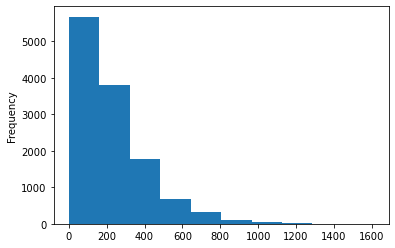

In [893]:
print(data[data.isFraud==True].transactionAmount.plot(kind='hist'))
print(data[data.isFraud==True].transactionAmount.describe())

The above plot shows a similar plot to all transactions which is positively skewed or right skewed

# 

##### Checking fraud with account numbers which should be unique for every individual

380680241    783
782081187    307
246251253    278
700725639    272
472288969    266
208319653    211
419709514    207
369308035    136
794398270    135
132629755    116
269616174    112
374358603    104
882815134     97
654507597     93
307632490     93
Name: accountNumber, dtype: int64

Total contribution towards frauds= 25.85165498912781


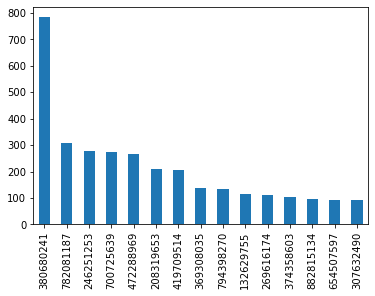

In [894]:
data[data.isFraud==True].accountNumber.value_counts()[:15].plot(kind='bar')
print(data[data.isFraud==True].accountNumber.value_counts()[:15])
print()
print('Total contribution towards frauds=',data[data.isFraud==True].accountNumber.value_counts()[:15].sum()*100/data.isFraud.sum())

About 26% of total fraud transactions are from above top 15 account numbers

##### 

###### Fraud transaction on last 4 digits of card numbers

593     783
6002    278
9522    272
7629    211
2178    207
7654    155
7256    153
8971    139
1142    127
8208    116
Name: cardLast4Digits, dtype: int64

Total contribution towards frauds= 19.658532656841427


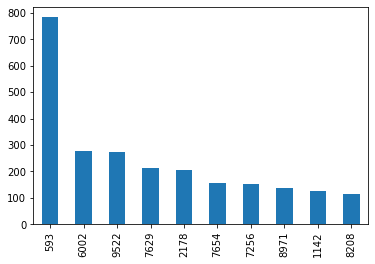

In [895]:
data[data.isFraud==True].cardLast4Digits.value_counts()[:10].plot(kind='bar')
print(data[data.isFraud==True].cardLast4Digits.value_counts()[:10])
print()
print('Total contribution towards frauds=',data[data.isFraud==True].cardLast4Digits.value_counts()[:10].sum()*100/data.isFraud.sum())

About 1/5th of the fraud transactions are from the above top 10 card numbers


But there is a possibility that last 4 digits are same for n users so I will keep that in mind while feature engineering and modeling

##### 

#### The correlation of above 2 bar plots is high so we can say that these are almost the same transaction records. I will be dropping the correlated variables after feature engineering.

##### 

##### % of fraud transactions as per merchant country code

<AxesSubplot:>

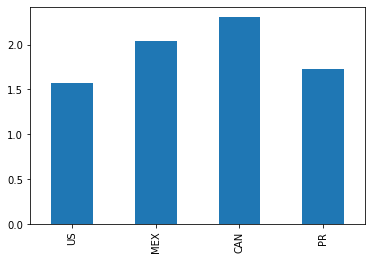

In [896]:
(data[data.isFraud==True].merchantCountryCode.value_counts()*100/data.merchantCountryCode.value_counts()).plot(kind='bar')

###### 

I will be using the above patterns that I found out in feature engineering so as to use these patterns and help the model indentify these patterns to make a better prediction!

##### 

##### Duplicates check

As per given condition, I am grouping by 'accountNumber','merchantName'and 'transactionAmount' and then finding all the reversed transactions. 

Thereafter, I will use the datetime library to differentiate the transactionDateTime column to see if a vendor charged the same amount to a customer within a day's time. If yes, I will assume it is a multi swipe mistake by the vendor and consider it as a duplicated row item.

In [897]:
df=data.copy()

In [898]:
T=data[data.duplicated(subset=['accountNumber','merchantName','transactionAmount'], keep=False)]
print("Total fraud transactions for reversal type is",(T[T.transactionType=='REVERSAL'].isFraud==True).sum())
dollar_amount_from_reversal=(T[T.transactionType=='REVERSAL']).transactionAmount.sum()
T[T.transactionType=='REVERSAL']

Total fraud transactions for reversal type is 310


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False
156,984504651,984504651,50000.0,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,True,False,False
181,984504651,984504651,50000.0,38090.70,2016-02-04T00:14:42,83.64,1st Sandwitch Bar #801388,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,11909.30,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786014,205026043,205026043,5000.0,1571.26,2016-09-18T06:08:02,56.26,Lyft,US,US,05,...,2008-04-15,2008-04-15,359,359,258,REVERSAL,3428.74,False,False,False
786072,288358186,288358186,7500.0,7367.55,2016-08-28T11:21:32,20.66,ebay.com,US,US,09,...,2014-08-21,2014-08-21,355,355,1665,REVERSAL,132.45,False,False,False
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,2014-11-17,2014-11-17,175,175,321,REVERSAL,201.79,True,False,False
786219,638498773,638498773,10000.0,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,4668.67,True,False,False


In [899]:
data.drop((T[T.transactionType=='REVERSAL']).index,inplace=True)
df.drop((T[T.transactionType=='REVERSAL']).index,inplace=True)
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


##### $ amount from reversal

In [903]:
dollar_amount_from_reversal

2670166.29

##### 

##### Multi Swipe

I am assuming "Short Span of time" to be 24 hours. 
So, if a vendor charges the same amount from a particular customer/account number within 24 hours, that is a multi swipe duplicated transaction.

In [900]:
df['transactionDateTime'] =  pd.to_datetime(df['transactionDateTime'], format='%Y-%m-%dT%H:%M:%S') #changing to datetime type
temp=df[df.duplicated(subset=['accountNumber','transactionAmount','merchantName'], keep=False)]
temp=temp.sort_values(['transactionAmount'])
temp['is_Duplicate'] = (temp.sort_values(['transactionDateTime'])
                       .groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(60*60*24))
temp[['accountNumber','transactionDateTime','transactionAmount','merchantName','is_Duplicate','isFraud']].tail(10)

,accountNumber,transactionDateTime,transactionAmount,merchantName,is_Duplicate,isFraud
198813,132629755,2016-02-14 00:24:03,1079.93,Uber,True,False
100285,740574175,2016-12-10 14:27:31,1113.03,Tim Hortons #989270,True,False
100284,740574175,2016-12-10 14:25:05,1113.03,Tim Hortons #989270,False,False
662200,721928928,2016-09-07 23:49:05,1114.32,alibaba.com,True,False
662199,721928928,2016-09-07 23:46:24,1114.32,alibaba.com,False,False
392852,569040573,2016-05-15 13:05:37,1120.04,oldnavy.com,False,False
392853,569040573,2016-05-15 13:07:35,1120.04,oldnavy.com,True,False
568810,448544073,2016-01-23 09:46:34,1394.19,Subway #19692,True,False
568811,448544073,2016-01-23 09:46:44,1394.19,Subway #19692,True,False
568809,448544073,2016-01-23 09:45:40,1394.19,Subway #19692,False,False


In [901]:
print('no. of duplicates ',temp.is_Duplicate.sum())
data.drop(temp[temp.is_Duplicate==True].index,inplace=True)

no. of duplicates  9488


##### $ amount towards multi swipe

In [902]:
dollar_amount_from_multi_swipe=temp[temp.is_Duplicate==True].transactionAmount.sum()
dollar_amount_from_multi_swipe

1106774.46

##### 

##### Total \\$ amount towards Duplicated transactions

In [904]:
dollar_amount_from_reversal+dollar_amount_from_multi_swipe

3776940.75

##### 

False    746543
True      11969
Name: isFraud, dtype: int64

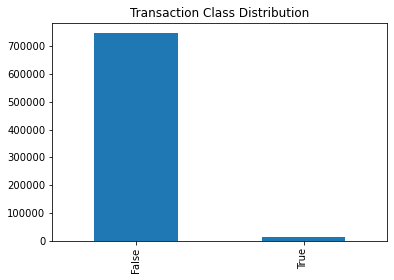

In [905]:
data.isFraud.value_counts().plot(kind='bar')
plt.title("Transaction Class Distribution")
data.isFraud.value_counts()

This is a highly imbalanced dataset problem where 'Fraud' is the minority class and 'Not Fraud' is the majority class.
So at a later point, I will test some techniques to handle imbalanced data like over-sampling, under-sampling, Smote etc.

##### 

##### Stratified Test Train split (80 : 20) 

In [906]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,train_size=0.8,stratify=data['isFraud'],random_state=42)

Stratified test train split ensures that the ratio of minority and majority classes is retained.

In [907]:
train.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

##### 

It is essential to prevent data leakage. So, whatever features I engineer, I will do that using the train data and use the same data to map it to test set without using or manipulating the test data.

###### Checking CVV and creating a new feature "CVV_check" : True is entered cvv is equal to actual cvv. False otherwise

In [908]:
train['CVV_check']=train.cardCVV==train.enteredCVV
test['CVV_check']=test.cardCVV==test.enteredCVV

##### 

In [911]:
train.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVV_check,contribution_%_by_account_number,contribution_%_by_cardLast4Digits
580791,882815134,882815134,50000.0,41062.73,2016-02-08T17:31:33,54.87,Hilton Hotels #720012,US,US,05,...,959,8502,PURCHASE,8937.27,False,False,False,True,0.741514,0.417755
266003,380680241,380680241,5000.0,2970.45,2016-10-14T21:34:28,14.79,Fresh eCards,US,US,80,...,869,593,PURCHASE,2029.55,False,False,False,True,6.172324,6.172324
236122,735497372,735497372,15000.0,8797.08,2016-02-16T17:02:16,91.87,EZ Putt Putt #240241,US,US,09,...,440,9096,PURCHASE,6202.92,True,False,False,True,-1.000000,-1.000000
108768,611548179,611548179,5000.0,2095.10,2016-02-10T05:50:15,31.11,oldnavy.com,US,US,05,...,699,7984,PURCHASE,2904.90,False,False,False,True,0.052219,0.062663
32118,492335288,492335288,2500.0,2365.59,2016-10-30T06:56:11,164.43,cheapfast.com,US,US,05,...,894,9363,PURCHASE,134.41,False,False,False,True,0.020888,0.020888


In [912]:
# total % of fraud transactions per account number

#dict(train[train.isFraud==True].accountNumber.value_counts()*100/train.isFraud.sum())

train['contribution_%_by_account_number']=train['accountNumber'].map(dict(train[train.isFraud==True].accountNumber.value_counts()*100/train.isFraud.sum()))
test['contribution_%_by_account_number']=test['accountNumber'].map(dict(train[train.isFraud==True].accountNumber.value_counts()*100/train.isFraud.sum()))

train['contribution_%_by_account_number']=train['contribution_%_by_account_number'].fillna(-1)
test['contribution_%_by_account_number']=test['contribution_%_by_account_number'].fillna(-1)

#if it is na, it means no fraud for that particular account number

This feature shows the percentage contribution towards the fraudulent data by each account number or customer id.
correlation of account number and customer id is 1 which means both represent the same account and is unique for all accounts.

##### 

In [913]:
# total % of fraud transactions groupby Card last 4 digit

train['contribution_%_by_cardLast4Digits']=train['cardLast4Digits'].map(dict(train[train.isFraud==True].cardLast4Digits.value_counts()*100/train.isFraud.sum()))
test['contribution_%_by_cardLast4Digits']=test['cardLast4Digits'].map(dict(train[train.isFraud==True].cardLast4Digits.value_counts()*100/train.isFraud.sum()))

train['contribution_%_by_cardLast4Digits']=train['contribution_%_by_cardLast4Digits'].fillna(-1)
test['contribution_%_by_cardLast4Digits']=test['contribution_%_by_cardLast4Digits'].fillna(-1)

#if it is na, it means no fraud for that particular card number


This feature shows the contribution for a group of each card by last 4 digits.

##### 

In [914]:
# merchant category code
mapping_percentage=dict((train[train.isFraud==True].groupby('merchantCategoryCode').count()['isFraud'])*100/train[train.isFraud==True]['merchantCategoryCode'].value_counts().sum())
train['contribution_%_by_merchantCategoryCode']=train['merchantCategoryCode'].map(mapping_percentage)
test['contribution_%_by_merchantCategoryCode']=test['merchantCategoryCode'].map(mapping_percentage)
train['contribution_%_by_merchantCategoryCode']=train['contribution_%_by_merchantCategoryCode'].fillna(-1)
test['contribution_%_by_merchantCategoryCode']=test['contribution_%_by_merchantCategoryCode'].fillna(-1)

This feature shows the percentage contribution towards the fraudulent data by merchant category.

##### 

In [915]:
# total % of fraud transactions groupby merchantName

train['contribution_%_by_merchantName']=train['merchantName'].map(dict(train[train.isFraud==True].merchantName.value_counts()*100/train.isFraud.sum()))
test['contribution_%_by_merchantName']=test['merchantName'].map(dict(train[train.isFraud==True].merchantName.value_counts()*100/train.isFraud.sum()))

train['contribution_%_by_merchantName']=train['contribution_%_by_merchantName'].fillna(-1)
test['contribution_%_by_merchantName']=test['contribution_%_by_merchantName'].fillna(-1)

#if it is na, it means no fraud for that particular merchantName


This feature shows the percentage contribution of each merchant towards fraudulent transactions.

##### 

In [916]:
train

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVV_check,contribution_%_by_account_number,contribution_%_by_cardLast4Digits,contribution_%_by_merchantCategoryCode,contribution_%_by_merchantName
580791,882815134,882815134,50000.0,41062.73,2016-02-08T17:31:33,54.87,Hilton Hotels #720012,US,US,05,...,PURCHASE,8937.27,False,False,False,True,0.741514,0.417755,2.005222,-1.000000
266003,380680241,380680241,5000.0,2970.45,2016-10-14T21:34:28,14.79,Fresh eCards,US,US,80,...,PURCHASE,2029.55,False,False,False,True,6.172324,6.172324,12.731070,1.744125
236122,735497372,735497372,15000.0,8797.08,2016-02-16T17:02:16,91.87,EZ Putt Putt #240241,US,US,09,...,PURCHASE,6202.92,True,False,False,True,-1.000000,-1.000000,7.634465,0.438642
108768,611548179,611548179,5000.0,2095.10,2016-02-10T05:50:15,31.11,oldnavy.com,US,US,05,...,PURCHASE,2904.90,False,False,False,True,0.052219,0.062663,40.010444,3.362924
32118,492335288,492335288,2500.0,2365.59,2016-10-30T06:56:11,164.43,cheapfast.com,US,US,05,...,PURCHASE,134.41,False,False,False,True,0.020888,0.020888,40.010444,3.456919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59505,246251253,246251253,5000.0,1652.47,2016-12-25T23:27:38,142.83,Burger King #911143,US,US,05,...,PURCHASE,3347.53,True,False,False,True,2.266319,2.266319,8.647520,0.010444
218531,154757034,154757034,20000.0,19868.41,2016-08-20T13:17:02,0.00,staples.com,US,US,05,...,ADDRESS_VERIFICATION,131.59,False,False,False,True,-1.000000,0.010444,40.010444,3.206266
163134,592932056,592932056,1000.0,615.57,2016-10-06T14:30:49,366.39,Shell Repair,US,US,02,...,PURCHASE,384.43,True,False,False,True,0.062663,-1.000000,2.360313,0.146214
741045,541038801,541038801,2500.0,233.70,2016-10-05T00:47:47,1.66,CVS #314207,US,US,09,...,PURCHASE,2266.30,False,False,False,True,-1.000000,-1.000000,0.731070,-1.000000


##### 

##### 

##### Correlation Check and dropping correlated variables

In [918]:
df1=train.copy()
for i in df1:
    if df1[i].dtypes=='object':
        df1[i]=df1[i].astype('category').cat.codes

dropping correlated variables :  ['customerId', 'availableMoney', 'merchantCountryCode', 'enteredCVV', 'contribution_%_by_cardLast4Digits']


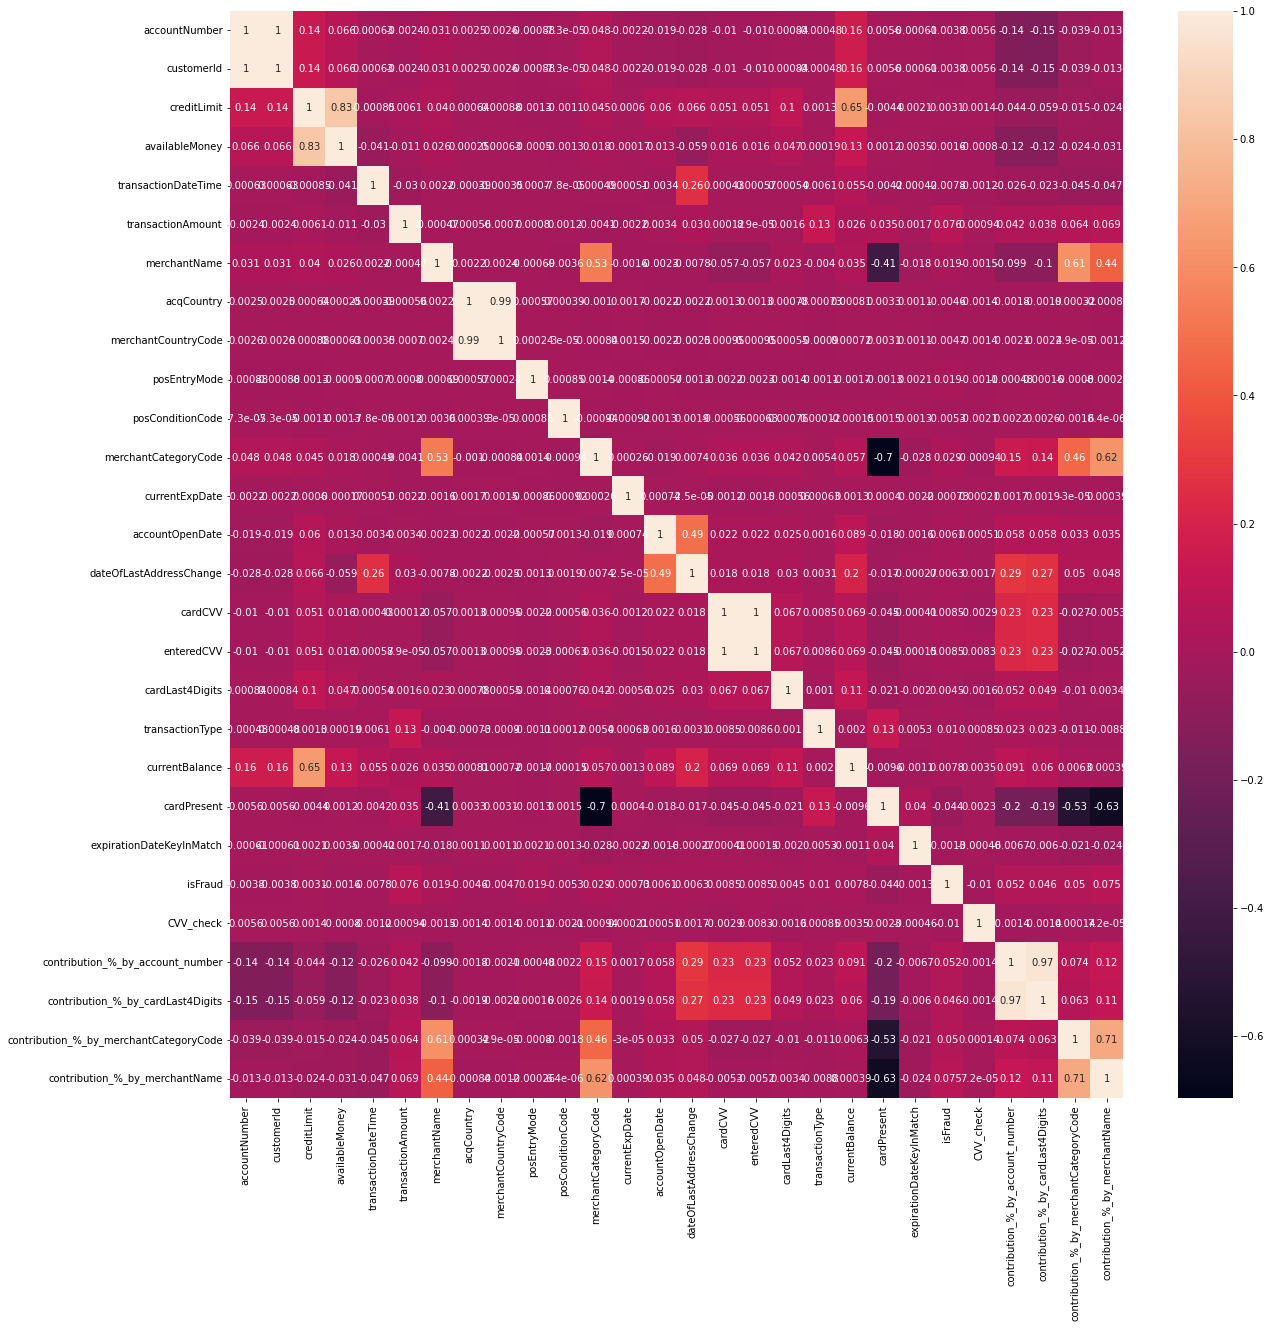

In [920]:
corr_matrix = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corr_matrix,annot=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("dropping correlated variables : ",to_drop)
train.drop(to_drop,1,inplace=True)
test.drop(to_drop,1,inplace=True)

In [921]:
train.columns

Index(['accountNumber', 'creditLimit', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV',
       'cardLast4Digits', 'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'CVV_check',
       'contribution_%_by_account_number',
       'contribution_%_by_merchantCategoryCode',
       'contribution_%_by_merchantName'],
      dtype='object')

After dropping the correlated variables, there are a few more features that need to dropped. 

For instance, 
transactionDateTime : this feature shows the date time on which the transaction was made. This essentially adds no value to the model.

In [922]:
l=['accountNumber', 'transactionDateTime','acqCountry', 'currentExpDate',
   'accountOpenDate', 'dateOfLastAddressChange','posEntryMode',
   'posConditionCode','cardCVV','cardLast4Digits', 'expirationDateKeyInMatch']
train.drop(l,1,inplace=True)
test.drop(l,1,inplace=True)

In [923]:
train.dtypes

creditLimit                               float64
transactionAmount                         float64
merchantName                               object
merchantCategoryCode                       object
transactionType                            object
currentBalance                            float64
cardPresent                                  bool
isFraud                                      bool
CVV_check                                    bool
contribution_%_by_account_number          float64
contribution_%_by_merchantCategoryCode    float64
contribution_%_by_merchantName            float64
dtype: object

###### handling categorical data type

In [924]:
for i in train:
    if train[i].dtypes=='object':
        train[i]=train[i].astype('category').cat.codes
        test[i]=test[i].astype('category').cat.codes

##### 

##### Final correlation check

<AxesSubplot:>

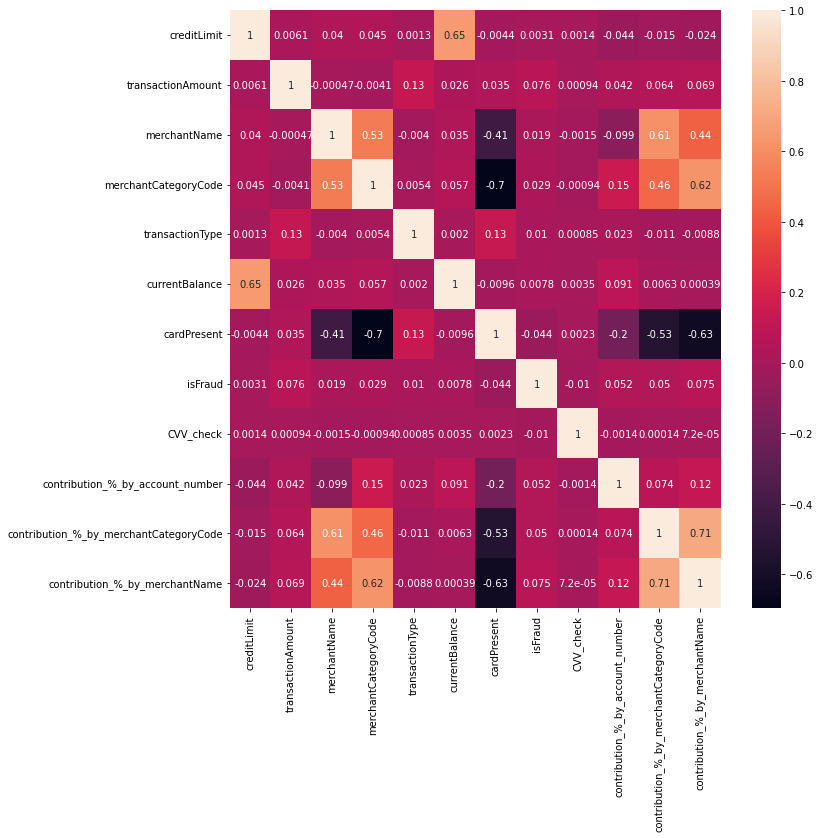

In [926]:
corr_matrix = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_matrix,annot=True)


Now none of the features are correlated and these can be used for modeling.

##### 

In [927]:
feature_list=list(train.columns)
feature_list

['creditLimit',
 'transactionAmount',
 'merchantName',
 'merchantCategoryCode',
 'transactionType',
 'currentBalance',
 'cardPresent',
 'isFraud',
 'CVV_check',
 'contribution_%_by_account_number',
 'contribution_%_by_merchantCategoryCode',
 'contribution_%_by_merchantName']

In [928]:
feature_list=list(train.columns)
y_train=train[feature_list[feature_list.index('isFraud')]]
y_test=test[feature_list[feature_list.index('isFraud')]]
del feature_list[feature_list.index('isFraud')]

X_train=train[feature_list]
X_test=test[feature_list]

##### This step basically sets the X_train, X_test, y_train and y_test values

##### 

###### Feature Scaling 

In [930]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [931]:
X_train.shape,X_test.shape

((606809, 11), (151703, 11))

In [932]:
y_train.shape,y_test.shape

((606809,), (151703,))

##### 

##### 

##### SMOTE for imbalanced dataset

In [857]:
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.under_sampling import NearMiss
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({False: 597234, True: 9575})
The number of classes after fit Counter({False: 593092, True: 443783})


Smote is synthetic minority over-sampling which over samples the minority data points by creating new data points in the feature space using k nearest neighbours algorithm.

I will be testing with and without Smote data.

##### 

#### Modeling

Now, Since this is a highly imbalanced dataset, 
there are 2 ways to look at the modeling and performance metric:

1. I am assuming it is essential to classify the Fraudulent transactions which means that the recall of 'True' class in isFraud dependent variable should be as high as possible.

2. Trade off between f1 score of both the classes

My gut feeling says that even if a transaction is predicted "True" but in reality it was "False" (Type 1 error), it is not that problematic as opposed to otherwise which is a fraudulent transaction being predicted as not Fraud.

So I will be focussing to achieve a recall score as high as possible for "True" fraud transactions so the Data Analyst does not miss out on fraud transactions predicted by the model!

##### 

###### Gradient Boosting

[[109286  40023]
 [   970   1424]]
0.7297812172468573
              precision    recall  f1-score   support

       False       0.99      0.73      0.84    149309
        True       0.03      0.59      0.06      2394

    accuracy                           0.73    151703
   macro avg       0.51      0.66      0.45    151703
weighted avg       0.98      0.73      0.83    151703



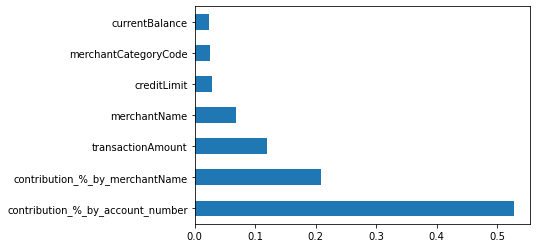

In [970]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# feature importance
feat_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

Gradient Boosting with Synthetic Oversampled data gives an overall accuracy of almost 73 % with a recall score of 59% for the minority class (True Fraud data). I feel this is a good trade off between overall accuracy and capturing minority classes.

However, I found other models capturing the minority classes way better that this but compromising overall accuracy.


The most important features are shown in the Bar Plot!

##### 

###### Light Gradient Boosting

[[77496 71813]
 [  471  1923]]
Model accuracy  0.523516344436168
              precision    recall  f1-score   support

       False       0.99      0.52      0.68    149309
        True       0.03      0.80      0.05      2394

    accuracy                           0.52    151703
   macro avg       0.51      0.66      0.37    151703
weighted avg       0.98      0.52      0.67    151703



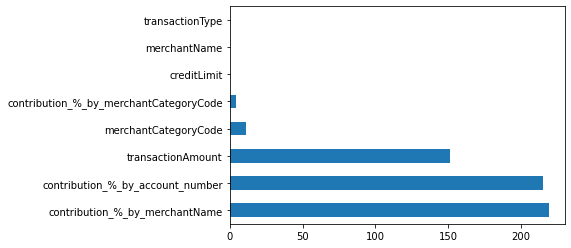

In [971]:
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=LGBMClassifier(n_estimators=200, num_leaves=4,min_child_samples=100,class_weight='balanced',
                     learning_rate=0.01,#scale_pos_weight=0.022,#reg_alpha=0.0, reg_lambda=0.0,
                    subsample=0.8, random_state=1, verbose=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Model accuracy ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# feature importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

For light gbm, the model accuracy is not very high but the recall value of "True" class is 80% which is very good for this imbalanced data.

##### 

[[95651 53658]
 [  785  1609]]
Model accuracy  0.6411211380130913
              precision    recall  f1-score   support

       False       0.99      0.64      0.78    149309
        True       0.03      0.67      0.06      2394

    accuracy                           0.64    151703
   macro avg       0.51      0.66      0.42    151703
weighted avg       0.98      0.64      0.77    151703



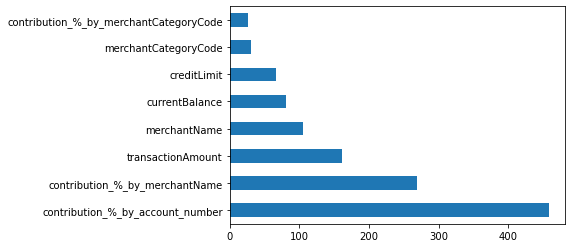

In [972]:
# lightgbm with smote data
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=LGBMClassifier(n_estimators=400, num_leaves=4,min_child_samples=100,class_weight='balanced',
                     learning_rate=0.02,subsample=0.8, random_state=1, verbose=-1)

model.fit(X_train_ns, y_train_ns)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Model accuracy ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# feature importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

If I use the SMOTE data, model accuracy increases to 64% but compromises the recall score to 67% for "True" class which I feel is a good compromise.

So this Trade off between recall value of minority class ("True" Fraudulent class) and Overall accuracy has to be decided!

##### 

##### XGBoosting

In [961]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.01,verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_predict=xgb_model.predict(X_test)
print(confusion_matrix(y_test,xgb_predict))
print(accuracy_score(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

[[149309      0]
 [  2349     45]]
0.9845157973144895
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    149309
        True       1.00      0.02      0.04      2394

    accuracy                           0.98    151703
   macro avg       0.99      0.51      0.51    151703
weighted avg       0.98      0.98      0.98    151703



Overall accuracy is impressively 98% but this model fails to capture most of the minority classes which defeats the purpose of Fraudulent classification :(

##### 

[[98802 50507]
 [  822  1572]]
0.6616480886996302
              precision    recall  f1-score   support

       False       0.99      0.66      0.79    149309
        True       0.03      0.66      0.06      2394

    accuracy                           0.66    151703
   macro avg       0.51      0.66      0.43    151703
weighted avg       0.98      0.66      0.78    151703



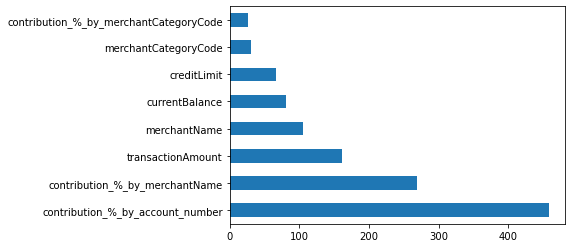

In [973]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.01,verbosity=0)
xgb_model.fit(X_train_ns, y_train_ns)
xgb_predict=xgb_model.predict(X_test)
print(confusion_matrix(y_test,xgb_predict))
print(accuracy_score(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

# feature importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Using the Smote data, the xgboosting model is able to classify minority classes better.

##### 

##### Decision Trees

In [952]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[146715   2594]
 [  1894    500]]
0.9704158783939671
              precision    recall  f1-score   support

       False       0.99      0.98      0.98    149309
        True       0.16      0.21      0.18      2394

    accuracy                           0.97    151703
   macro avg       0.57      0.60      0.58    151703
weighted avg       0.97      0.97      0.97    151703



In [953]:
# Decision Trees on SMOTE Data
clf = DecisionTreeClassifier()

clf = clf.fit(X_train_ns,y_train_ns)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[139097  10212]
 [  1594    800]]
0.9221768850978557
              precision    recall  f1-score   support

       False       0.99      0.93      0.96    149309
        True       0.07      0.33      0.12      2394

    accuracy                           0.92    151703
   macro avg       0.53      0.63      0.54    151703
weighted avg       0.97      0.92      0.95    151703



###### 

In [956]:
# # hyper parameter optimization on decision trees
# param_dict={
#     "criterion":['gini','entropy'],
#     "max_depth" : range(1,10),
#     "min_samples_split":range(1,10),
#     "min_samples_leaf":range(1,5)
# }
# grid=GridSearchCV(clf,
#                  param_grid=param_dict,
#                  cv=5,
#                  verbose=1,
#                  n_jobs=-1)
# grid.fit(X_train,y_train)
# print(grid.best_params_)
# grid.best_estimator_

##### 

###### Randomforest Classifier

In [957]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[149252     57]
 [  2061    333]]
0.9860385094559765
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    149309
        True       0.85      0.14      0.24      2394

    accuracy                           0.99    151703
   macro avg       0.92      0.57      0.62    151703
weighted avg       0.98      0.99      0.98    151703



In [958]:
# Randomforest on SMOTE Data

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[138852  10457]
 [  1537    857]]
0.9209376215368187
              precision    recall  f1-score   support

       False       0.99      0.93      0.96    149309
        True       0.08      0.36      0.13      2394

    accuracy                           0.92    151703
   macro avg       0.53      0.64      0.54    151703
weighted avg       0.97      0.92      0.95    151703



##### 

### Key takeaways from modeling phase

1. There is a crucial decision of trade off between the overall accuracy and accuracy for minority classes that has to be made to truly judge the above models.


2. Light Gradient Boosting model is predicting 1923 True minority classes out of 2394 test data points which gives a recall score of 80%. This is the best model capturing most of the minority classes. However, the overall accuracy is 52%, lower than other models.


3. A good trade off is achieved with Extreme Gradient Boosting with both overall accuracy and minority class recall of 66%.


4. Randomforest (Bagging) and Decision Trees seem to give a brilliant overall accuracy of 90-99% But they fail to classify the minority Class (True for Fraudulent data). 

### About the Features

After running the models, the 3 most important feature that appears on every model's feature importance is
1. percentage of fraud contribution by different bank accounts. (New feature during Feature Engineering)
2. percentage of fraud contribution by different Merchants.  (New feature during Feature Engineering)
3. the Transaction amount.

The reason behind this could be the trend followed by a specific bank accounts and the place (by Merchant) where these Frauds happen.

### If I had more time, I'd

1. Focus more on EDA and Feature Engineering. With the time span, I could create one level features which showed great importance during modeling. With more features showing the patterns followed by the people scamming, better results can be achieved. For instance, I would make use of the transaction_datetime raw feature to understand the pattern like how often do some bank accounts make a fraudulent transaction. It could be how ofter every day/week/month etc.

2. Do hyperparameter optimization. Most of the models above are vanilla without their hyperparameters tuned. Hyperparameter tuning with grid search or random search cross validation can reduce overfitting and give optimal hyperparameters.


##### References 

- https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://xgboost.readthedocs.io/en/stable/ 
- https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8